# Analyse of IForest FalseAlarm

## Test with 1 dimension dataset

In [1]:
import sys
import os
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score

In [2]:
print(os.getcwd())

/Users/TogbeMaurras/Documents/GitHub/OD_Jupyter/od_methods/IsoFo/IForest_Analysis/dimension_influence_IForestImplementation/1D


In [3]:
print(sys.path)

['/Users/TogbeMaurras/Documents/GitHub/OD_Jupyter/od_methods/IsoFo/IForest_Analysis/dimension_influence_IForestImplementation/1D', '/opt/anaconda3/lib/python37.zip', '/opt/anaconda3/lib/python3.7', '/opt/anaconda3/lib/python3.7/lib-dynload', '', '/opt/anaconda3/lib/python3.7/site-packages', '/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/TogbeMaurras/.ipython', '../../../../../', '../']


## Generals settings

In [4]:
max_samples = 256
n_trees = 100
threshold = 0.6

## Chargement du jeu de données

In [5]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_full_brut, y_full_transform, full_dataset = dts.OneD_V1_1()
print("X_full_brut")
print(X_full_brut.describe())
print("y_full_transform")
print(y_full_transform.describe())
print("full_dataset")
print(full_dataset.describe())

X_normals_brut, y_normals_transform, full_normals_dataset = datat.only_normals('../../../../'+dts.path_1D_V1_1)
print("X_normals_brut")
print(X_normals_brut.describe())
print("y_normals_transform")
print(y_normals_transform.describe())
print("full_normals_dataset")
print(full_normals_dataset.describe())

X_full_brut
                 0
count  1516.000000
mean      0.032098
std       1.107025
min      -3.334118
25%      -0.692580
50%      -0.034028
75%       0.649778
max       6.867883
y_full_transform
                 0
count  1516.000000
mean      0.980211
std       0.198020
min      -1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
full_dataset
                 0
count  1516.000000
mean      0.032098
std       1.107025
min      -3.334118
25%      -0.692580
50%      -0.034028
75%       0.649778
max       6.867883
X_normals_brut
                 0
count  1501.000000
mean     -0.018564
std       0.983771
min      -3.334118
25%      -0.698590
50%      -0.046579
75%       0.628556
max       3.330985
y_normals_transform
            0
count  1501.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
full_normals_dataset
                 0
count  1501.000000
mean     -0.018564
std       0.983771
min      -3.3341

## Entraînement avec un jeu de données mixte (normal + anormal) et faire la prédiction uniquement sur les données normales

[[   0    0]
 [ 115 1386]]
Score min = 0.47402959674443296
Score max = 0.8186561067188557


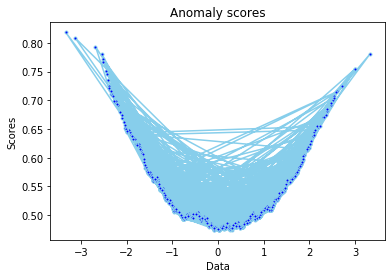

In [6]:
# Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
IFD_y_pred_IF, scores =func_IFD.fit(X=X_full_brut).predict(X=X_normals_brut, threshold=threshold)

print(confusion_matrix(y_normals_transform, IFD_y_pred_IF))

print("Score min = "+str(np.min(scores)))
print("Score max = "+str(np.max(scores)))
visu.plot_2D(X_normals_brut[0], scores,'Data', 'Scores', "Anomaly scores", link="b").show()

## Entraînement sur une jeu de données mixte (normal + anormal) et faire la prédiction sur tout le jeu de données mais extraire uniquement les scores des données supposées être normales pour faire les analyses

[[  15    0]
 [ 120 1381]]
Score min = 0.47706128675526527
Score max = 0.8727576204983356


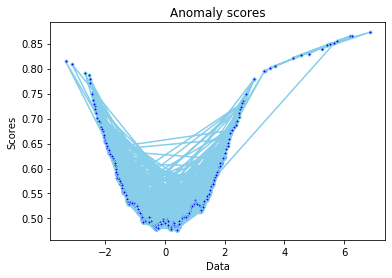

In [7]:
# Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
IFD_y_pred_IF, scores =func_IFD.fit(X=X_full_brut).predict(X=X_full_brut, threshold=threshold)

print(confusion_matrix(y_full_transform, IFD_y_pred_IF))

print("Score min = "+str(np.min(scores)))
print("Score max = "+str(np.max(scores)))
visu.plot_2D(X_full_brut[0], scores,'Data', 'Scores', "Anomaly scores", link='b').show()

In [8]:
scores_scores = []
for s in scores:
    scores_scores.append(s)
scores_data = pd.DataFrame(scores_scores, columns=['scores'])
merged_data = pd.concat([full_dataset, scores_data], axis=1, sort=False)
merged_data

,0,1,scores
0,0.000000,is_normal,0.489131
1,-0.784259,1,0.503660
2,0.788448,1,0.513270
3,-2.008725,1,0.654284
4,-0.168597,1,0.491229
...,...,...,...
1511,6.256410,0,0.865773
1512,5.251181,0,0.839936
1513,6.867883,0,0.872758
1514,5.516938,0,0.849407


In [9]:
normals_data_and_scores = merged_data[merged_data[len(merged_data.columns) - 2] == '1']
normals_data_and_scores.sort_values(by="scores", ascending=False)

,0,1,scores
585,-3.334118,1,0.814260
8,-3.125944,1,0.808961
897,3.330985,1,0.795023
924,-2.681622,1,0.790190
434,-2.545530,1,0.786685
...,...,...,...
1362,0.390469,1,0.477604
750,0.388673,1,0.477301
525,0.387751,1,0.477301
1395,0.388332,1,0.477301


Score min = 0.47706128675526527
Score max = 0.8142597236364041


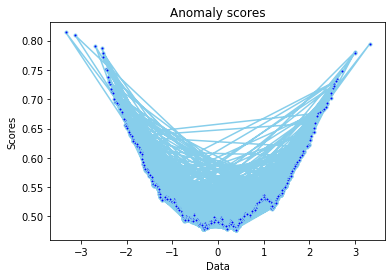

In [10]:
print("Score min = "+str(np.min(normals_data_and_scores['scores'])))
print("Score max = "+str(np.max(normals_data_and_scores['scores'])))
visu.plot_2D(normals_data_and_scores[0], normals_data_and_scores['scores'],'Data', 'Scores', "Anomaly scores", link='b').show()

## Retrouver la toute première valeur  considérée par IForest comme anormal
Une analyse de son écart avec la moyenne pour donner une idée sur l'écart type à partir duquel IForest pense que les données sont anormales. Bien sûr cet écart type ne sera pas figé puisqu'il s'agit d'une forêt d'arbres aléatoires qui contribuent tous au calcul du score d'aberrance. Ainsi, l'écart type recherché (qui pourrait être une généralité) serait un interval. Un interval d'écart à partir duquel les données concernées sont déclarées anormales par IForest.

Un tel résultat s'il s'avère vérifié et applicable à tous les jeux de données voudrait dire que IForest aussi se base sur un interval de confiance pour distinguer les données normales des données anormales.

In [52]:
# La moyenne de tout le jeu de données (normal + anormal)
mu_general = np.mean(X_full_brut)
print("mu = "+str(mu_general))
# L'écart type de tout le jeu de données (normal + anormal)
std_general = np.std(X_full_brut)
print("std = "+str(std_general))

mu = 0    0.032098
dtype: float64
std = 0    1.10666
dtype: float64


In [72]:
# Les données originalement normales dont le score est supérieur à > threshold
false_alarm_data = normals_data_and_scores[normals_data_and_scores['scores'] > threshold]
false_alarm_data.sort_values(by="scores", ascending=True)

,0,1,scores
1233,1.793261,1,0.602008
308,1.800940,1,0.602071
1091,1.815404,1,0.604000
19,1.814959,1,0.604000
382,1.817786,1,0.604063
...,...,...,...
434,-2.545530,1,0.786685
924,-2.681622,1,0.790190
897,3.330985,1,0.795023
8,-3.125944,1,0.808961


In [63]:
# Interval de dconfiance
max_interval = mu_general[0] + std_general[0]
print("max_interval = "+str(max_interval))
min_interval = mu_general[0] - std_general[0]
print("min_interval = "+str(min_interval))

max_interval = 1.1387584955676437
min_interval = -1.0745615257369903


In [70]:
# Les données originalement normales mais mal classées dont la valeur est supérieure à mu+std
false_alarm_data_superior = false_alarm_data[false_alarm_data[0] > max_interval]
false_alarm_data_superior_sorted = false_alarm_data_superior.sort_values(by=0, ascending=True)
print(false_alarm_data_superior_sorted)
print("Nombre de données normales supérieur mal classées = "+str(len(false_alarm_data_superior)))

             0  1    scores
1233  1.793261  1  0.602008
308   1.800940  1  0.602071
19    1.814959  1  0.604000
1091  1.815404  1  0.604000
382   1.817786  1  0.604063
1436  1.832100  1  0.605476
49    1.837086  1  0.605780
1077  1.853818  1  0.611352
188   1.862180  1  0.611288
765   1.870039  1  0.608532
31    1.877255  1  0.609459
627   1.890015  1  0.610949
373   1.942896  1  0.619935
800   1.943314  1  0.619935
423   1.944918  1  0.618316
1124  1.951494  1  0.620744
537   1.955220  1  0.620809
1069  1.967870  1  0.621957
538   1.983500  1  0.621714
728   1.986861  1  0.622651
170   1.992505  1  0.623724
996   2.006308  1  0.630225
349   2.009329  1  0.631176
825   2.009515  1  0.631493
783   2.040050  1  0.638099
1354  2.076021  1  0.644696
1368  2.095017  1  0.644562
576   2.107729  1  0.651090
559   2.110712  1  0.651744
915   2.136514  1  0.659480
575   2.177314  1  0.671476
267   2.191943  1  0.676284
1343  2.224574  1  0.677734
274   2.305224  1  0.682173
366   2.312550  1  0

In [75]:
# Les données originalement normales mais mal classées dont la valeur est inférieure à mu+std
false_alarm_data_under = false_alarm_data[false_alarm_data[0] < min_interval]
false_alarm_data_under_sorted = false_alarm_data_under.sort_values(by=0, ascending=False)
print(false_alarm_data_under_sorted)
print("Nombre de données normales inférieure mal classées = "+str(len(false_alarm_data_under)))

             0  1    scores
144  -1.658805  1  0.604207
63   -1.663247  1  0.605568
1024 -1.664611  1  0.606177
283  -1.669997  1  0.610364
601  -1.694592  1  0.609713
...        ... ..       ...
797  -2.523807  1  0.779606
434  -2.545530  1  0.786685
924  -2.681622  1  0.790190
8    -3.125944  1  0.808961
585  -3.334118  1  0.814260

[69 rows x 3 columns]
Nombre de données normales inférieure mal classées = 69


In [84]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-std, mu+std]
predicted_normals_data = merged_data[merged_data['scores'] < threshold]
print("Nombre de données classées normales = "+str(len(predicted_normals_data)))

predicted_normals_data_upper = predicted_normals_data[predicted_normals_data[0] >= min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(predicted_normals_data_upper)))

predicted_normals_data_between = predicted_normals_data_upper[predicted_normals_data_upper[0] <= max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(predicted_normals_data_between)))

predicted_normals_data_under = predicted_normals_data[predicted_normals_data[0] < min_interval]
print("Nombre de données classées normales inférieures à min = "+str(len(predicted_normals_data_under)))
predicted_normals_data_upper_max = predicted_normals_data[predicted_normals_data[0] > max_interval]
print("Nombre de données classées normales supérieures à max  = "+str(len(predicted_normals_data_upper_max)))
print("Nombre de données classées normales hors de l'interval de confiance  = "+
      str(len(predicted_normals_data_under) + len(predicted_normals_data_upper_max)))

#predicted_normals_data_between = predicted_normals_data[predicted_normals_data[0] >= min_interval and predicted_normals_data[0] <= max_interval]
#print("Nombre de données classées normales between  = "+str(len(predicted_normals_data_between)))

Nombre de données classées normales = 1381
Nombre de données classées normales supérieures à min = 1241
Nombre de données classées normales dans l'interval  = 1096
Nombre de données classées normales inférieures à min = 140
Nombre de données classées normales supérieures à max  = 145
Nombre de données classées normales dans l'interval de confiance  = 285


In [85]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-2std, mu+2std]
new_max_interval = mu_general[0] + 2 * std_general[0]
print("new_max_interval = "+str(new_max_interval))
new_min_interval = mu_general[0] - 2 * std_general[0]
print("new_min_interval = "+str(new_min_interval))

new_predicted_normals_data_upper = predicted_normals_data[predicted_normals_data[0] >= new_min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(new_predicted_normals_data_upper)))

new_predicted_normals_data_between = new_predicted_normals_data_upper[new_predicted_normals_data_upper[0] <= new_max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(new_predicted_normals_data_between)))

new_predicted_normals_data_under = predicted_normals_data[predicted_normals_data[0] < new_min_interval]
print("Nombre de données classées normales inférieures à min = "+str(len(new_predicted_normals_data_under)))
new_predicted_normals_data_upper_max = predicted_normals_data[predicted_normals_data[0] > new_max_interval]
print("Nombre de données classées normales supérieures à max  = "+str(len(new_predicted_normals_data_upper_max)))
print("Nombre de données classées normales hors de l'interval de confiance  = "+
      str(len(new_predicted_normals_data_under) + len(new_predicted_normals_data_upper_max)))

#predicted_normals_data_between = predicted_normals_data[predicted_normals_data[0] >= min_interval and predicted_normals_data[0] <= max_interval]
#print("Nombre de données classées normales between  = "+str(len(predicted_normals_data_between)))

new_max_interval = 2.245418506219961
new_min_interval = -2.181221536389307
Nombre de données classées normales supérieures à min = 1381
Nombre de données classées normales dans l'interval  = 1381
Nombre de données classées normales inférieures à min = 0
Nombre de données classées normales supérieures à max  = 0
Nombre de données classées normales dans l'interval de confiance  = 0


In [86]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-2std, mu+2std]
new_predicted_data_upper = merged_data[merged_data[0] >= new_min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(new_predicted_data_upper)))

new_predicted_data_between = new_predicted_data_upper[new_predicted_data_upper[0] <= new_max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(new_predicted_data_between)))

Nombre de données classées normales supérieures à min = 1492
Nombre de données classées normales dans l'interval  = 1459


## Conclusion

1- l'entraînement avec un jeu de données mixte (normal + anormal) et faire la prédiction uniquement sur les données normales

2- l'entraînement sur une jeu de données mixte (normal + anormal) et faire la prédiction sur tout le jeu de données mais extraire uniquement le scores des données supposées être normales pour faire les analyses

1 et 2 donnent pratiquement les même résultats. Ce qui est normal puisque la phase d'entraînement et celle de scoring sont indépendantes en terme de données exploitées.

L'analyse des données normales mal classées à conduire au constat que les fausses alertes ont été faites sur les données dont la valeur est hors de l'interval de confiance ]mu-std, mu+std[.

L'objectif étant de réduire considérablement les fausses alertes tout en gardant la meilleure spécificité et les meilleurs CPU Time, complexity et memory consumption,
- Proposer une formule de prédiction tenant compte de la moyenne et de l'écart standart de tout le jeu de données
    - Une idée: Ne plus faire la prédiction en se basant sur 0.5. Faire la prédiction en prenant comme référence le score de l'observation correspondante à la moyenne des valeurs. Au lieu de créer un interval de valeur de confiance comme pour les méthodes statistiques, créé une interval de scores de confiance en faisant le match entre l'observation correspondante à la valeur moyenne - écart type et celle correspondante à la valeur moyenne + écart type qui seront les limites de l'interval de scores de confiance.
    - Vérifier d'abord (dans le but de valider la méthode) que ces deux observations limites sont réellement des obervations normalement normales
- OU Proposer une formule de scoring tenant compte de l'effet de l'interval de confiance.
- Si les formules fonctionnent sur ce jeu de données alors tester sur les autres jeux de données pour voir l'efficacité.

Autre chose à vérifier: 
- Si les échantillons utilisé pour les arbres contiennent des valeurs anormales et à quel pourcentage pour chaque échantillon.
